# Affichage des nouvelles features

In [1]:
import numpy as np
import math
import time
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('..')

import data
import features

In [2]:
temp, dico = data.load_input_data('../data/train_input.csv')
output = data.load_output_data('../data/challenge_output.csv', temp, dico)

In [3]:
all_features = features.load_all_features(dico, temp, remove_useless=True)

100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [00:14<00:00, 16.53it/s]


All the features have been loaded in 14.53 sec
16 useless features have been removed. There are now 29 features for each setting.


In [17]:
all_features['building_10_0'].head()

,AC_on,AC_on_non_int,AC_on_without_lever,AC_on_without_lever_non_int,AC_value,AC_value_non_int,AC_value_without_lever,AC_value_without_lever_non_int,heating_on,heating_on_non_int,...,outside_temp,surface_1_m2_OUTW,surface_2_m2_OUTW,surface_3_m2_OUTW,surface_4_m2_OUTW,useful_surface_m2,window_percent_1_outwall,window_percent_2_outwall,window_percent_3_outwall,window_percent_4_outwall
0,0,0,0,0,32.0,32.0,30.332,30.332,0,0,...,1.2,844.2,652.67,1266.3,1109.55,6073.55,70.0,70.0,70.0,70.0
1,0,0,0,0,32.0,32.0,30.332,30.332,0,0,...,5.6,844.2,652.67,1266.3,1109.55,6073.55,70.0,70.0,70.0,70.0
2,0,0,0,0,32.0,32.0,30.332,30.332,0,0,...,9.9,844.2,652.67,1266.3,1109.55,6073.55,70.0,70.0,70.0,70.0
3,0,0,0,0,32.0,32.0,30.332,30.332,0,0,...,9.7,844.2,652.67,1266.3,1109.55,6073.55,70.0,70.0,70.0,70.0
4,0,0,0,0,32.0,32.0,30.332,30.332,0,0,...,9.5,844.2,652.67,1266.3,1109.55,6073.55,70.0,70.0,70.0,70.0


In [18]:
all_features['building_10_0'].keys()

Index(['AC_on', 'AC_on_non_int', 'AC_on_without_lever',
       'AC_on_without_lever_non_int', 'AC_value', 'AC_value_non_int',
       'AC_value_without_lever', 'AC_value_without_lever_non_int',
       'heating_on', 'heating_on_non_int', 'heating_on_without_lever',
       'heating_on_without_lever_non_int', 'heating_value',
       'heating_value_non_int', 'heating_value_without_lever',
       'heating_value_without_lever_non_int', 'hour', 'nb_occupants',
       'orientation', 'outside_temp', 'surface_1_m2_OUTW', 'surface_2_m2_OUTW',
       'surface_3_m2_OUTW', 'surface_4_m2_OUTW', 'useful_surface_m2',
       'window_percent_1_outwall', 'window_percent_2_outwall',
       'window_percent_3_outwall', 'window_percent_4_outwall'],
      dtype='object')

In [25]:
np.all(all_features['building_10_0']['AC_on_non_int'] == all_features['building_10_0']['AC_on_without_lever'])

False

In [19]:
def plot_sem(features_df, var, num_sem, name_building):
    features_df[name_building][var][num_sem*7*24:(num_sem+1)*7*24].plot()
    plt.title('Building {}, {} on the week {}'.format(name_building, var, num_sem))
    plt.show()

### 1. 'AC_value_without_lever' et 'heating_value_without_lever'
On a fait une moyenne pour les valeurs de la nuit pour éviter le palier de 24h à 0h

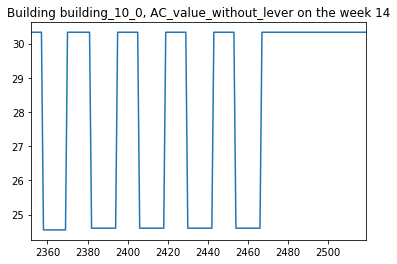

In [20]:
plot_sem(all_features, 'AC_value_without_lever', num_sem=14, name_building='building_10_0')

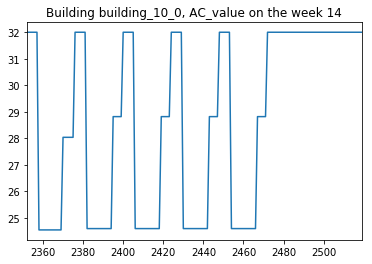

In [21]:
plot_sem(all_features, 'AC_value', num_sem=14, name_building='building_10_0')

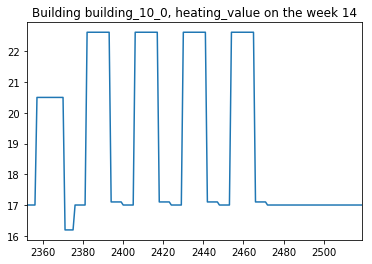

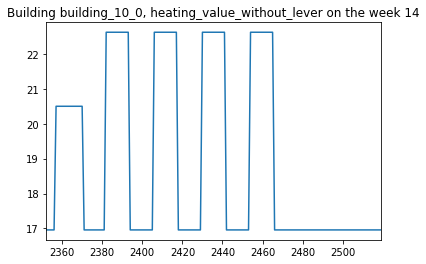

In [22]:
plot_sem(all_features, 'heating_value', num_sem=14, name_building='building_10_0')
plot_sem(all_features, 'heating_value_without_lever', num_sem=14, name_building='building_10_0')

### 2. 'AC_value_non_int'/'AC_on_non_int' et 'heating_value_non_int'/'heating_on_non_int'
Au lieu de remplacer les heures à virgule par l'entier le plus proche, sépare la valeur en fonction.

Lorsqu'un réglage s'active à une heure il n'est effectif qu'à l'heure suivante

Heures de reglages initiales: [0.0, 6.0, 18.5, 24.0]
Les valeurs associées: [17.0, 22.62, 17.1, 17.1]
Nouvelles heures [0.0, 7.0, 19.0, 20.0, 24.0]
Les valeurs associées: [17.0, 22.62, 19.86, 17.1, 17.1]


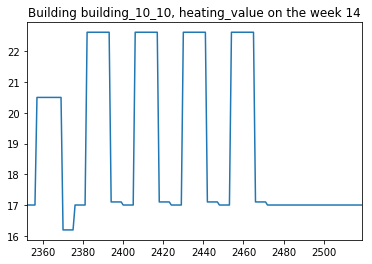

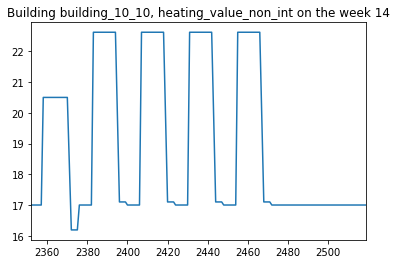

In [35]:
name_building = 'building_10_10'
num_sem = 14
print("Heures de reglages initiales:", dico[name_building]['heating_week_hours'])
print("Les valeurs associées:", dico[name_building]['heating_week_temperatures_degreC'])
print("Nouvelles heures", dico[name_building]['heating_week_hours_non_int'])
print("Les valeurs associées:", dico[name_building]['heating_week_temperatures_degreC_non_int'])

plot_sem(all_features, 'heating_value', num_sem, name_building)
plot_sem(all_features, 'heating_value_non_int', num_sem, name_building)

In [33]:
dico[name_building].keys()

dict_keys(['ventilation_week_hours', 'ventilation_week_ONif1', 'AC_week_hours', 'AC_week_temperatures_degreC', 'AC_WE_hours', 'AC_WE_temperatures_degreC', 'AC_monday_hours', 'AC_monday_temperatures_degreC', 'heating_week_hours', 'heating_week_temperatures_degreC', 'heating_WE_hours', 'heating_WE_temperatures_degreC', 'heating_monday_hours', 'heating_monday_temperatures_degreC', 'thickness_ground_m', 'thickness_outwall_m', 'thickness_intwall_m', 'thickness_intfloor_m', 'thickness_roof_m', 'airchange_infiltration_m3perh', 'airchange_ventilation_m3perh', 'AC_power_kW', 'heating_power_kW', 'window_percent_1_outwall', 'surface_1_m2_OUTW', 'window_percent_2_outwall', 'surface_2_m2_OUTW', 'window_percent_3_outwall', 'surface_3_m2_OUTW', 'surface_m2_GROU', 'surface_m2_ROOF', 'window_percent_4_outwall', 'surface_4_m2_OUTW', 'surface_m2_INTW', 'nb_occupants', 'nb_PCs', 'PCs_percent_on_night_WE', 'light_percent_on_night_WE', 'lighting_Wperm2', 'useful_surface_m2', 'volume2capacitance_coeff', 'ini

### 3. L'association de 'non_int' et 'without_lever'